# Make Results Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = 'omniglot'
architecture = 'simple'
branches = 3
method = 'concat'

## Ensemble

In [3]:
df = pd.read_csv('results/{}-{}/B{}-test.csv'.format(dataset, architecture, branches), header=None)

In [4]:
df

,0,1,2
0,NaN,concat_acc,mean_acc
1,0.0,0.8475000000000001,0.805
2,NaN,concat_acc,mean_acc
3,0.0,0.8375,0.8299999999999998
4,NaN,concat_acc,mean_acc
5,0.0,0.8525,0.8400000000000001
6,NaN,concat_acc,mean_acc
7,0.0,0.8524999999999998,0.8225
8,NaN,concat_acc,mean_acc
9,0.0,0.8425,0.8225


In [5]:
mean_acc = df.iloc[range(1, len(df.index)+1, 2), 2].astype('float32').mean()
print(mean_acc)

0.82562494


In [6]:
concat_acc = df.iloc[range(1, len(df.index)+1, 2), 1].astype('float32').mean()
print(concat_acc)

0.85


## Baseline

In [7]:
df = pd.read_csv('results/{}-{}/B{}-test.csv'.format(dataset, architecture, 1), header=None)
baseline_acc = df.iloc[range(1, len(df.index)+1, 2), 2].astype('float32').mean()

In [8]:
print(baseline_acc)

0.8034375


## Virtual Branching

In [9]:
results_concat = {}
results_mean = {}

for frac in [0, 0.25, 0.5, 0.75, 1]:
    df = pd.read_csv('results/vb-{}-{}/B{}/S{:.2f}/test.csv'.format(
            dataset,architecture, branches, frac))

    results_concat[frac] = df.iloc[0,1]
    results_mean[frac] = df.iloc[0,2]

In [10]:
results_concat

{0: 0.8725000000000002,
 0.25: 0.8575000000000002,
 0.5: 0.8375,
 0.75: 0.8225,
 1: 0.8225}

## Create Figure

In [11]:
results_concat_list = list(results_concat.items())
results_concat_list.sort()
results_concat_list = np.array(results_concat_list)
print(results_concat_list)

[[0.     0.8725]
 [0.25   0.8575]
 [0.5    0.8375]
 [0.75   0.8225]
 [1.     0.8225]]


In [12]:
results_mean_list = list(results_mean.items())
results_mean_list.sort()
results_mean_list = np.array(results_mean_list)
print(results_mean_list)

[[0.     0.8275]
 [0.25   0.84  ]
 [0.5    0.8325]
 [0.75   0.7975]
 [1.     0.7875]]


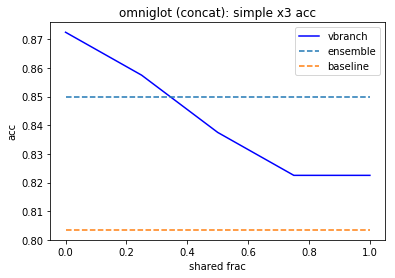

In [13]:
if method == 'concat':
    plt.plot(results_concat_list[:, 0], results_concat_list[:,1], label='vbranch', color='blue')
    plt.plot(results_concat_list[:, 0], [concat_acc]*len(results_concat_list), label='ensemble', linestyle='--')
else:
    plt.plot(results_mean_list[:, 0], results_mean_list[:,1], label='vbranch', color='cyan')
    plt.plot(results_concat_list[:, 0], [mean_acc]*len(results_concat_list), label='ensemble', linestyle='--')

plt.plot(results_concat_list[:, 0], [baseline_acc]*len(results_concat_list), label='baseline', linestyle='--')

plt.legend()
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{} ({}): {} x{} acc'.format(dataset, method, architecture, branches))

plt.savefig('figs/{}-{}-{}-{}-results.png'.format(dataset, architecture, branches, method))
plt.show()